# **STAGE PONTS INSTRUMENTES - Notebook 6**

## Table of Contents

### 0. [Bibliothèques](#0/-Biblitohèques)
### I. [Chargement de la data](#I/-Chargement-de-la-data)
### II. [Tri par vitesse](#II/-Tri-par-vitesse)

### III. [Calibration par vitesse et capteur](#III/-Calibration-par-vitesse-et-capteur)

### IV. [Fonction d'affichage des résultats](#IV/-Fonction-d'affichage-des-résultats)
### V.[Résultats](#V/-Résultats)
1. [Résultats à 70km/h sur tous les capteurs](#V.1-Résultats-:--vitesse-70km/h------Tous-les-capteurs)
1. [Résultats à 80km/h sur tous les capteurs](#V.1-Résultats-:--vitesse-80km/h------Tous-les-capteurs)
1. [Résultats à 90km/h sur tous les capteurs](#V.1-Résultats-:--vitesse-90km/h------Tous-les-capteurs)


**Nous allons voir dans ce Notebook les résultats (sur la reconstruction des signaux) en estimant la LI sur les camions roulant à des vitesses proches**

## 0/ Bibliothèques

In [1]:
from Bwifsttar import load_senlis_modified
from Bwifsttar import eval_LI_mt


## I/ Chargement de la data


In [2]:

def get_speeds(trucks):
    """
        Données :
            - trucks : Liste de namedTuple Truck
        Sorties :
            - speeds : Liste des différentes vitesses des camions pris en paramètre
        Fonction : Retourne la liste des vitesses d'une liste de camions
    """
    import numpy as np
    
    speeds = np.array([])
    for truck in trucks :
        if truck.speed not in speeds:
            speeds = np.append(speeds,truck.speed)
    return speeds

calibration_trucks,traffic_trucks = load_senlis_modified(selected=6) #[3,4,6,7]
speeds=get_speeds(calibration_trucks)
print("Vitesse des camions de calibration : ",speeds)

Vitesse des camions de calibration :  [23.99999024 24.38099198 23.2726991  23.63076923 24.00002913 21.63376871
 23.63077872 18.73168906 18.96301863 18.50599706 21.33334157 18.96294211]


## II/ Tri par vitesse

In [3]:
idx_70 = [0,2,5,7]
idx_90 = [1,4,8,9,10,11]
idx_80 = [3,6]

trucks_70 = speeds[idx_70]
trucks_80 = speeds[idx_80]
trucks_90 = speeds[idx_90]

In [4]:
def sort_trucks_speeds(trucks):
    """
        Données : 
            - trucks : Liste de namedTuple Truck
        Sorties :
            - trucks70 : Liste de namedTuple Truck roulant à environ 70km/h
            - trucks80 : Liste de namedTuple Truck roulant à environ 80km/h
            - trucks90 : Liste de namedTuple Truck roulant à environ 90km/h
        Fonction : Trie les camions par vitesse dans trois ensemble
    """
    idx_70 = [0,2,5,7]
    idx_90 = [1,4,8,9,10,11]
    idx_80 = [3,6]
    trucks70 = []
    for i in range(len(trucks)):
        if i in idx_70:
            trucks70.append(trucks[i])
    trucks80 = []
    for i in range(len(trucks)):
        if i in idx_80:
            trucks80.append(trucks[i])    
    
    trucks90 = []
    for i in range(len(trucks)):
        if i in idx_90:
            trucks90.append(trucks[i])          

    
    return trucks70,trucks80,trucks90

## III/ Calibration par vitesse et capteur

In [5]:

def lignes_influence_mt_speed(speed,capteurs, l2_reg=None, tv_reg=None):#spped = 70 or 80 or 90
    
    """
        Données : 
            - speed : vitesse des camions à sélectionner pour calculer la LI
            - capteurs : Liste des capteurs sur lesquels nous voulons faire les calculs
            - l2_reg : Régularisation L2
            - tv_reg : Régularisation Total Variation
        Sorties :
            - Hc : Liste des lignes d'influence calculées (une par capteur mis en paramètre)
        Fonction : Retourne la liste des lignes d'influence par capteur et par vitesse
    
    """
    import numpy as np
    from Bwifsttar import sort_trucks_speeds,calibration_mt_reg,load_senlis_modified
    
    
    # On initialise la liste des LI (une par capteur)
    Hc = np.empty(len(capteurs),dtype=object)#liste des lignes d'influence (autant que de capteurs à tester)
        
    for i,capteur in enumerate(capteurs):
        calibration_trucks,traffic_trucks = load_senlis_modified(selected=capteur) #[3,4,6,7]
        trucks70,trucks80,trucks90 = sort_trucks_speeds(calibration_trucks)
        
        if speed==70:
            h = calibration_mt_reg(trucks70, l2_reg, tv_reg)
            Hc[i] = h
            
        elif speed==80:
            h = calibration_mt_reg(trucks80, l2_reg, tv_reg)
            Hc[i] = h
            
        elif speed==90:
            h = calibration_mt_reg(trucks90, l2_reg, tv_reg)
            Hc[i] = h
        
        else:
            print("Vitesse indisponible")
   
        
    return Hc



## IV/ Fonction d'affichage des résultats

In [6]:
def multi_viz_speed(speed,Hs,capteurs):
    """
        Données :
            - speed : Vitesse des camions utilisés pour les calculs
            - Hs : Liste des lignes d'influence par capteur
            - capteurs : capteurs utilisés pour les calculs
        Sorties : 
            void
        Fonction : Affiche les résultats par vitesse et capteur
    """
    from Bwifsttar import load_senlis_modified,sort_trucks_speeds,show_calibration
    for i in range(len(Hs)):
        try:
            print("Capteur : ",capteurs[i])


            calibration_trucks,traffic_trucks = load_senlis_modified(selected=capteurs[i]) #[3,4,6,7]
            trucks70,trucks80,trucks90 = sort_trucks_speeds(calibration_trucks)
            if speed==70:
                show_calibration(trucks70, Hs[i])
            elif speed==80:
                show_calibration(trucks80, Hs[i])
            elif speed==90:
                show_calibration(trucks90,Hs[i])
            else:
                print("Vitesse indisponible")


        except:
            print("Echec capteur n° : ",capteurs[i])
            continue

**Pour la suite, nous ferons la calibration avec régularisation Total Variation (tv_reg)**

## V/ Résultats

### V.1 Résultats :  vitesse 70km/h  --  Tous les capteurs

In [7]:
capteurs = [3,4,6,7]
#capteurs =[6]
Hc_6 = lignes_influence_mt_speed(70,capteurs,tv_reg={'strength': 1e2, 'cutoff': 0.95})

Capteur :  3


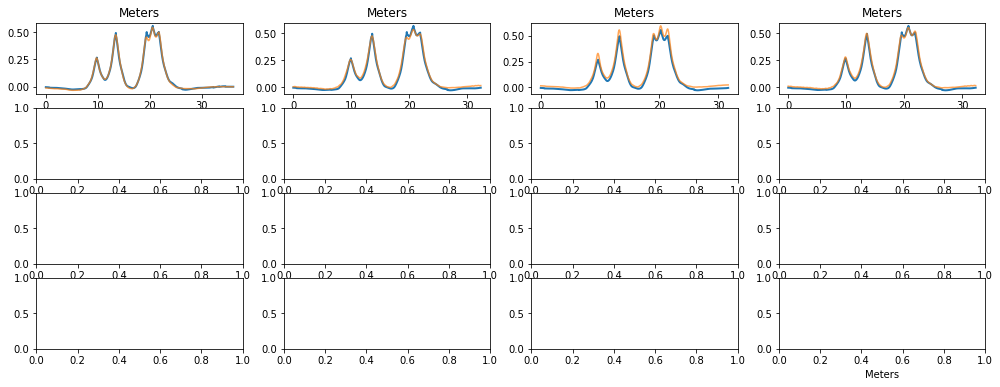

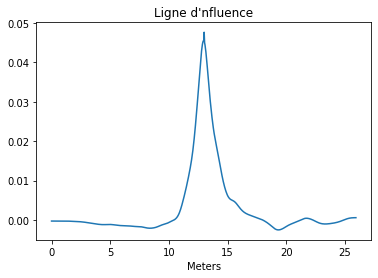

Capteur :  4


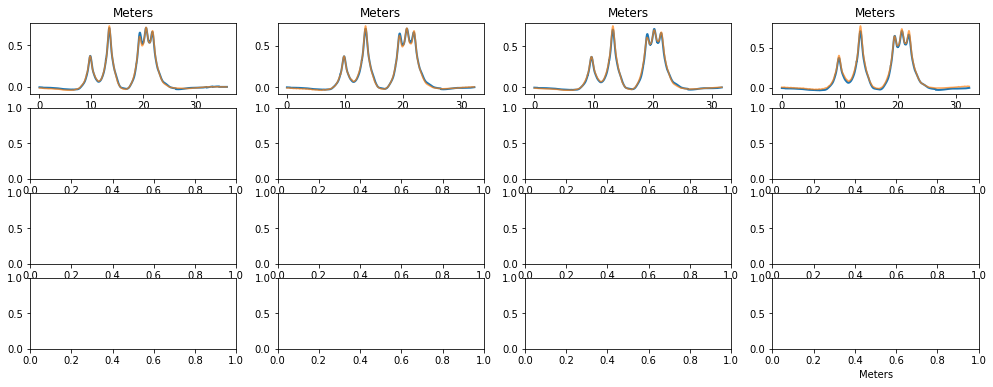

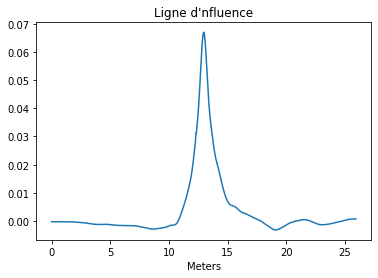

Capteur :  6


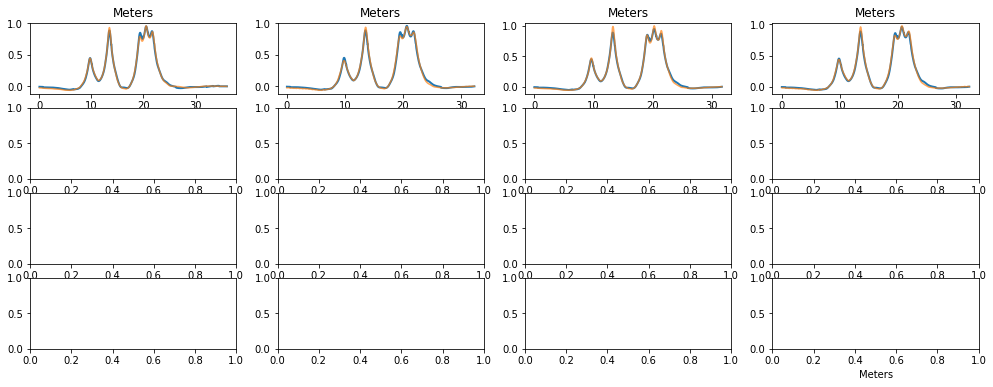

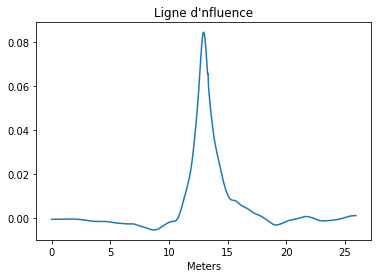

Capteur :  7


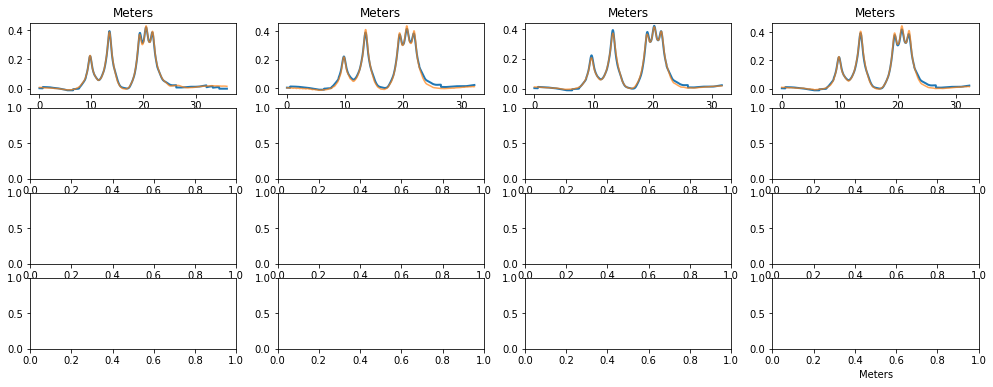

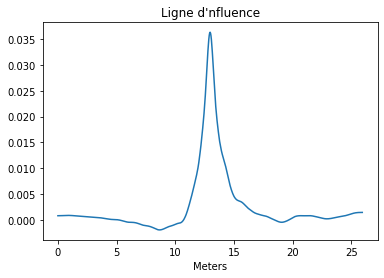

In [8]:
multi_viz_speed(70,Hc_6,capteurs)

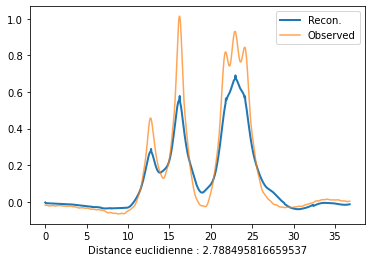

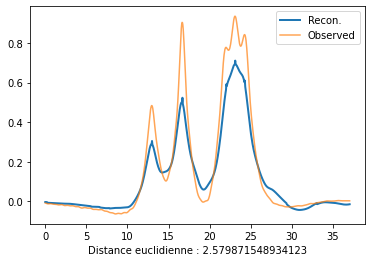

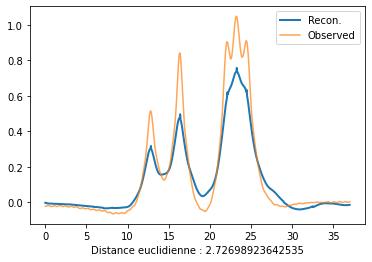

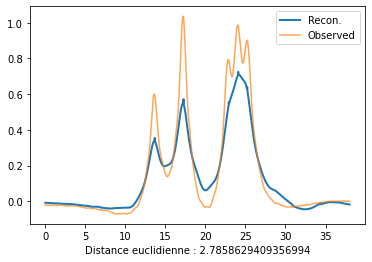

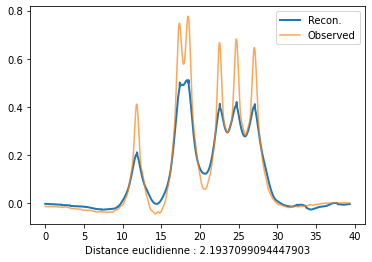

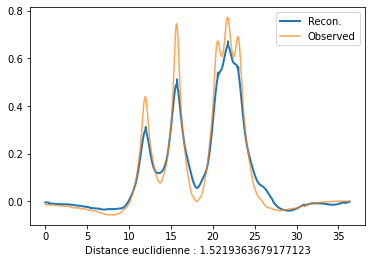

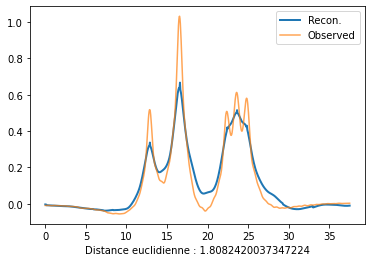

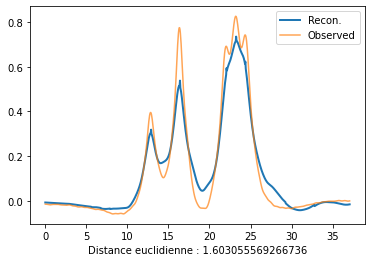

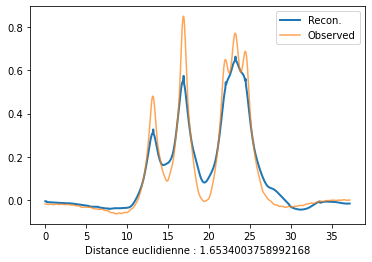

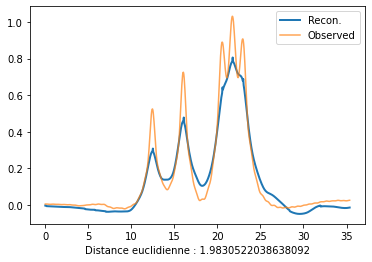

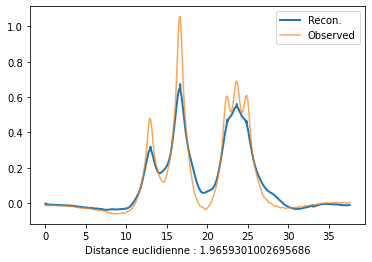

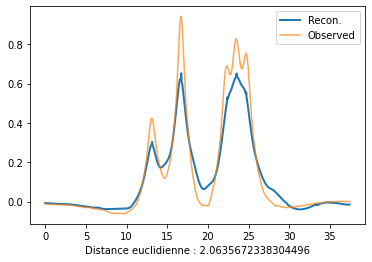

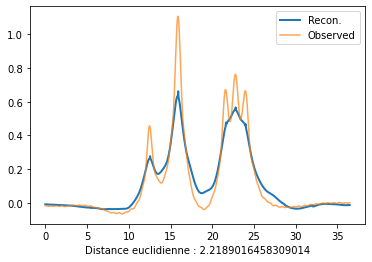

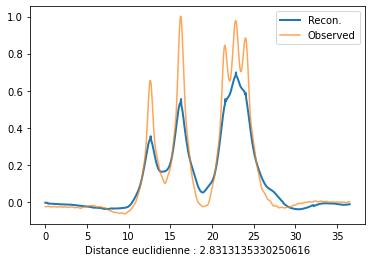

2.194594891859834

In [9]:

calib,traffic = load_senlis_modified(6)
traffic = [truck for truck in traffic if(len(truck.weights)==len(truck.peaks))]
eval_LI_mt(traffic,Hc_6[0],plot=True
          )

### V.2 Résultats :  vitesse 80km/h  --  Tous les capteurs

Capteur :  3


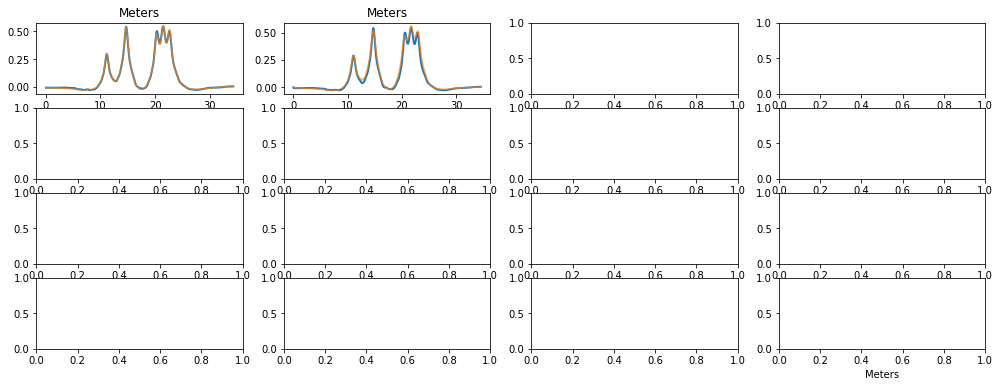

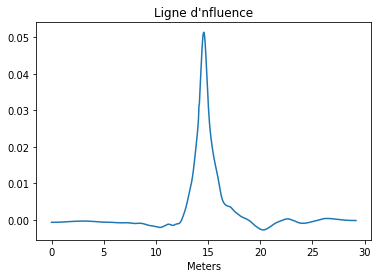

Capteur :  4


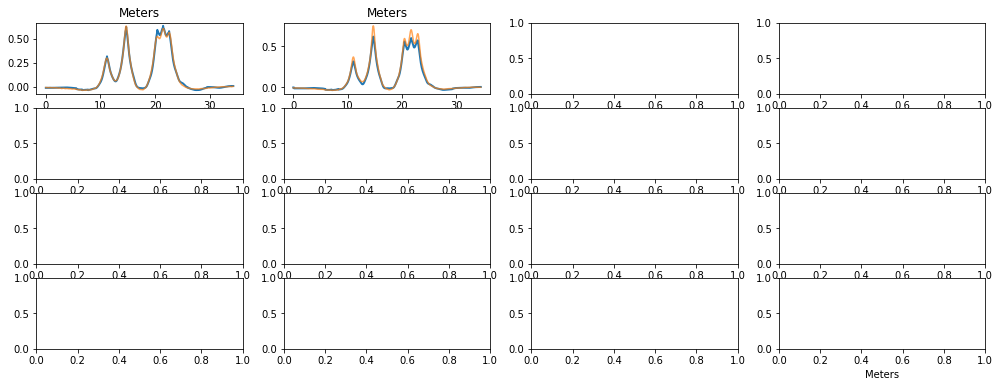

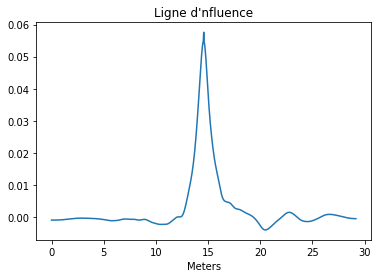

Capteur :  6


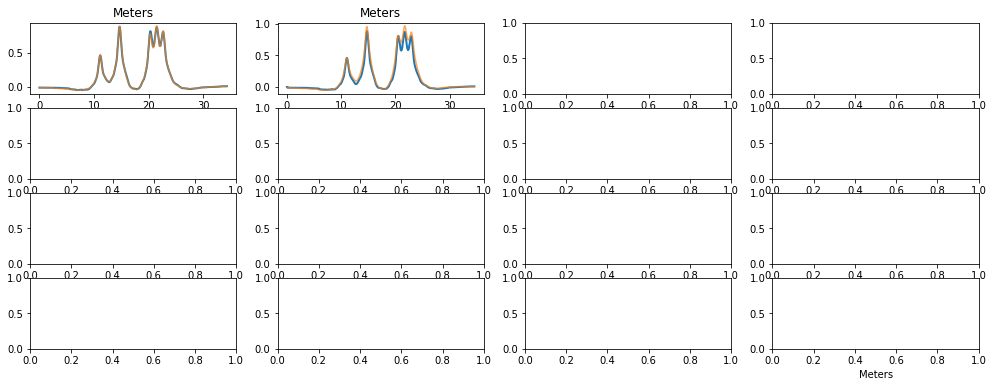

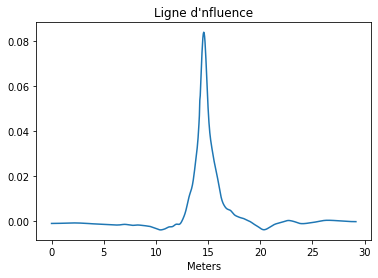

In [10]:
capteurs = [3,4,6]
#capteurs =[6]
Hc_6 = lignes_influence_mt_speed(80,capteurs,tv_reg={'strength': 1e2, 'cutoff': 0.95})
multi_viz_speed(80,Hc_6,capteurs)

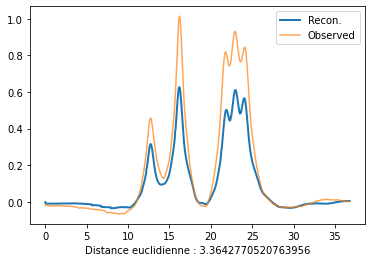

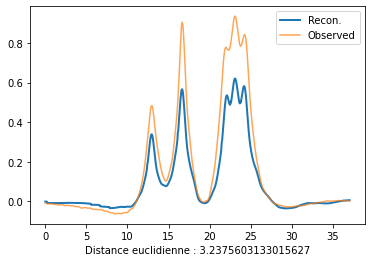

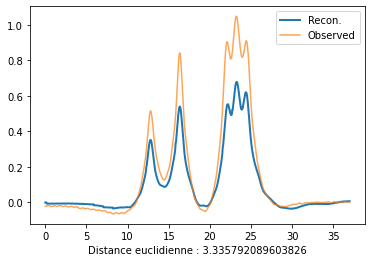

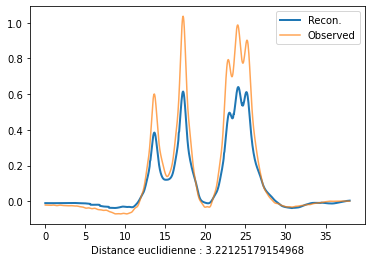

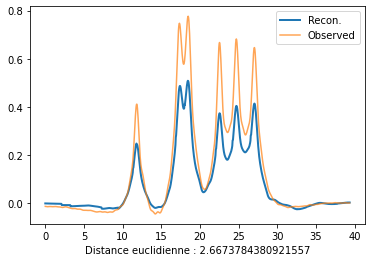

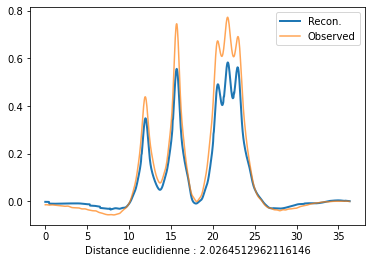

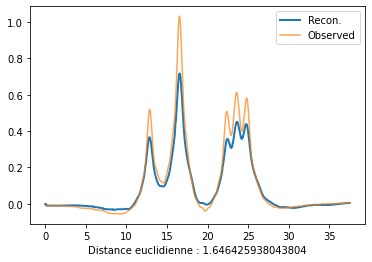

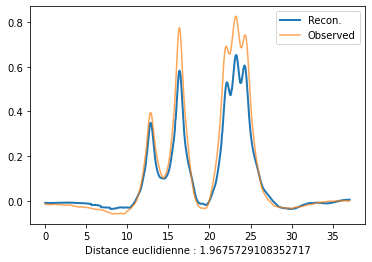

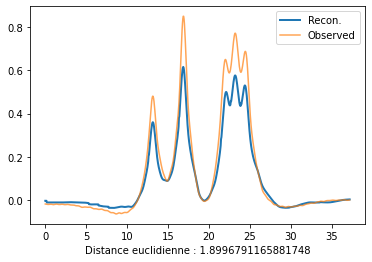

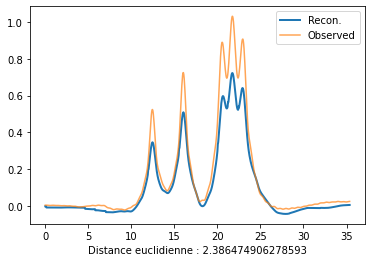

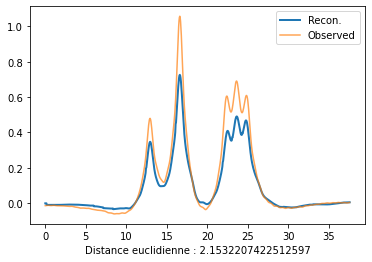

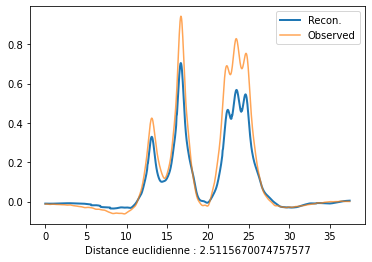

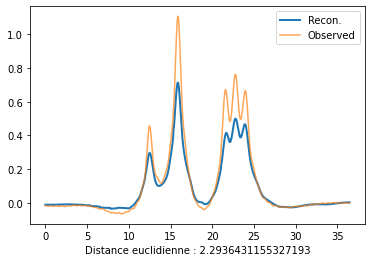

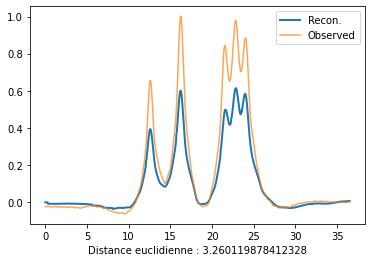

2.5693867568752244

In [11]:

calib,traffic = load_senlis_modified(6)
traffic = [truck for truck in traffic if(len(truck.weights)==len(truck.peaks))]
eval_LI_mt(traffic,Hc_6[0],plot=True
          )

### V.1 Résultats :  vitesse 90km/h  --  Tous les capteurs

Capteur :  3


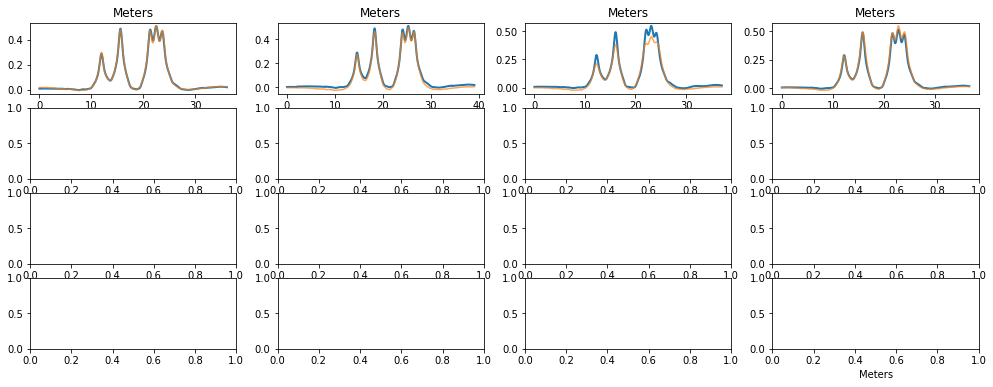

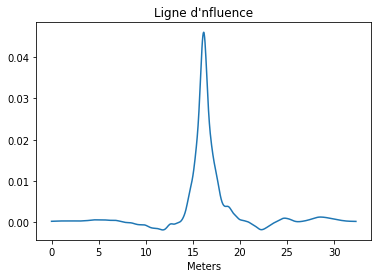

Capteur :  4


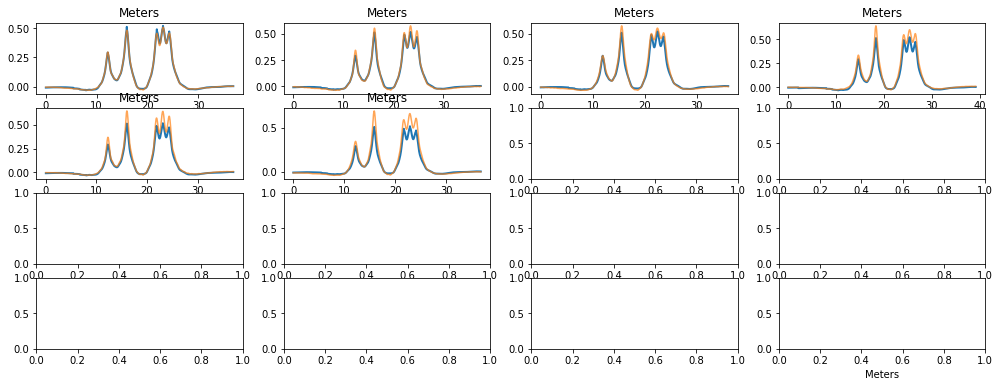

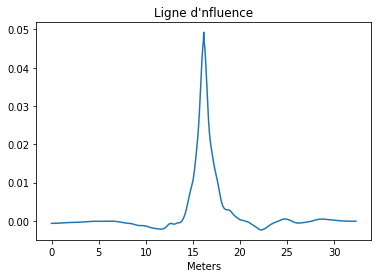

Capteur :  6


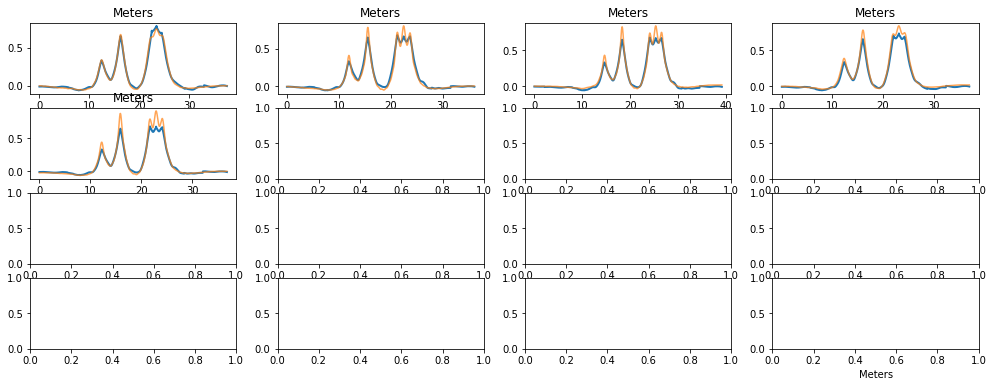

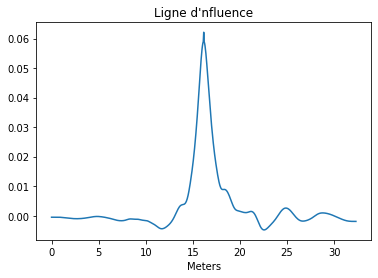

Capteur :  7


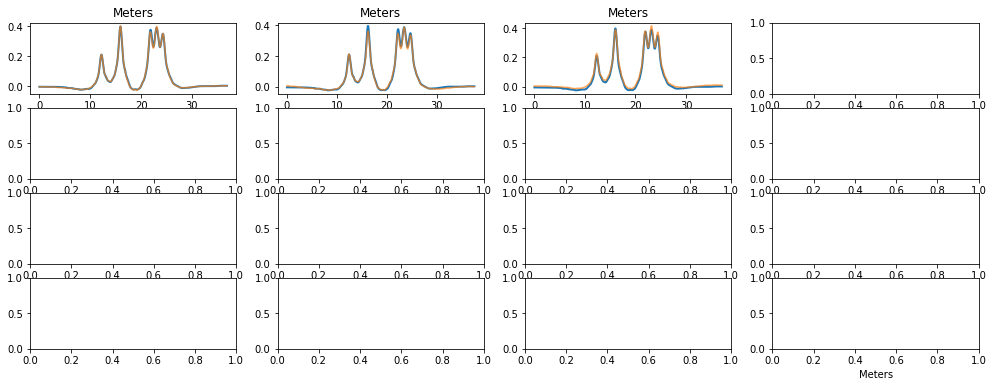

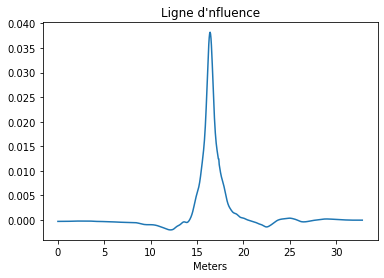

In [12]:
capteurs = [3,4,6,7]
#capteurs =[6]
Hc_6 = lignes_influence_mt_speed(90,capteurs,tv_reg={'strength': 1e2, 'cutoff': 0.95})
multi_viz_speed(90,Hc_6,capteurs)

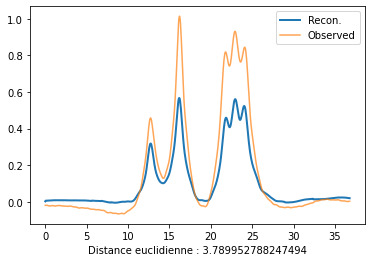

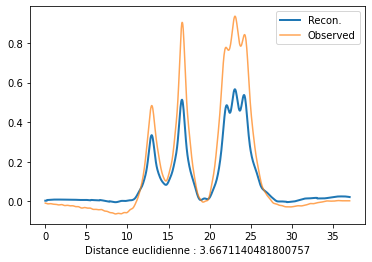

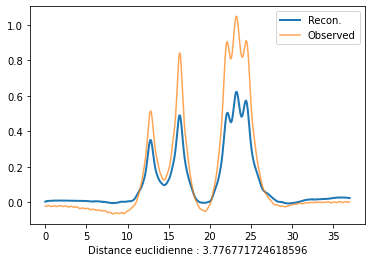

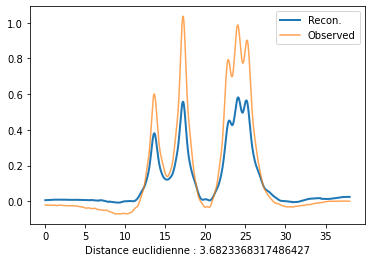

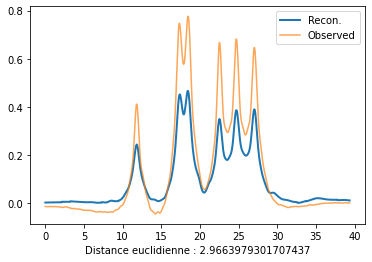

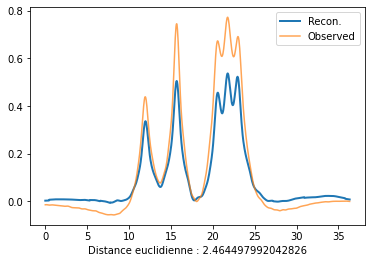

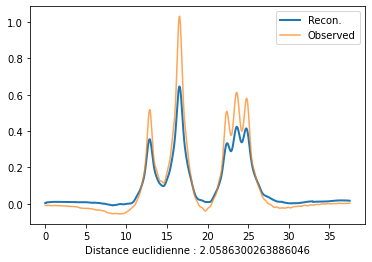

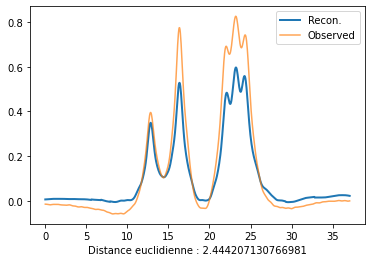

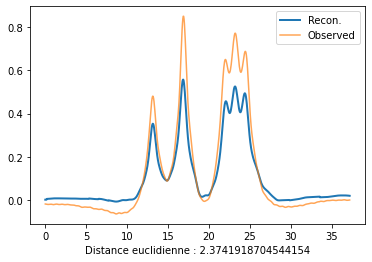

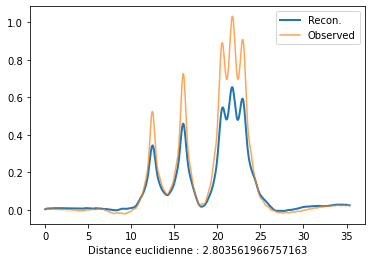

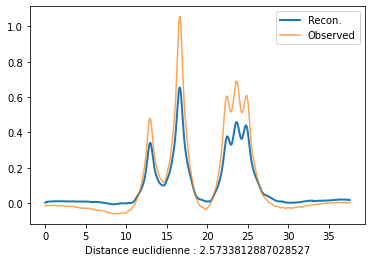

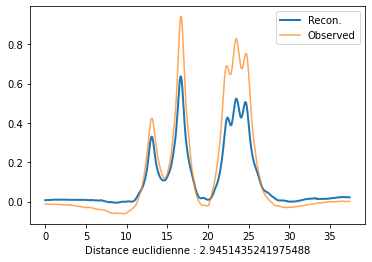

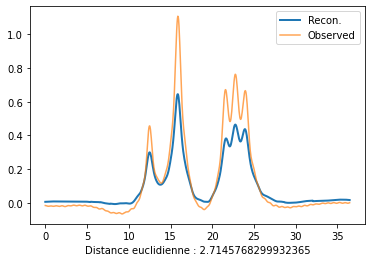

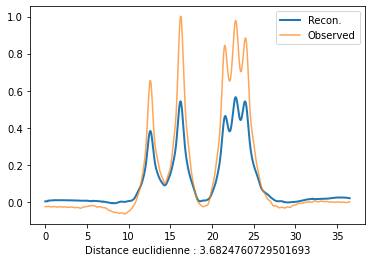

2.9959457160870957

In [13]:

calib,traffic = load_senlis_modified(6)
traffic = [truck for truck in traffic if(len(truck.weights)==len(truck.peaks))]
eval_LI_mt(traffic,Hc_6[0],plot=True
          )

**Nous constatons que le tri par vitesse donne de biens meilleurs résultats mais ne permet en aucun cas une généralisation sur l'ensemble des camions. Il y aurait donc des différences sur la LI en fonction de la vitesse. Une idée sera donc d'interpoler différentes LI avec les vitesses associées pour leur calcul.**